In [31]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, util
from skimage.filters import rank, gaussian, median
from skimage.morphology import disk

Задание 1: Загрузка и визуализация изображения

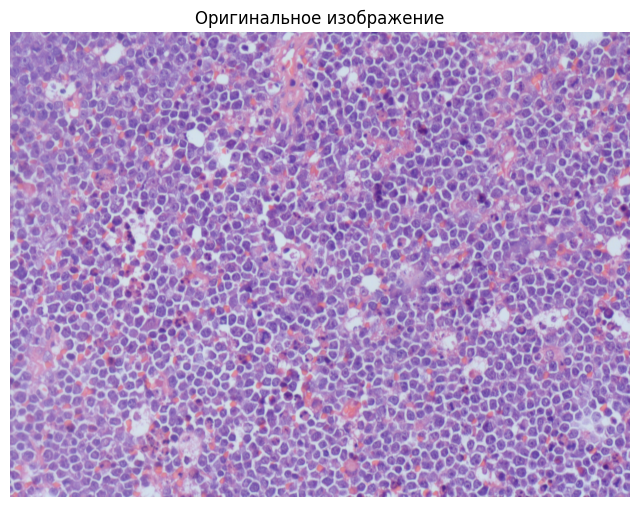

In [12]:
# 1. Загрузка биомедицинского изображения
image = io.imread('Изображения/3.tif')

# 2. Визуализация оригинального изображения
plt.figure(figsize=(8, 8))
plt.title("Оригинальное изображение")
plt.imshow(image)
plt.axis('off')
plt.show()

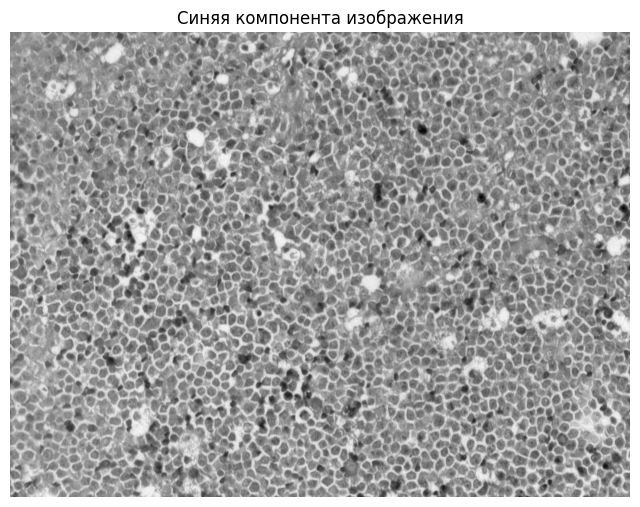

In [83]:
# Визуализаця синей компоненты изображения
blue_channel = image[:, :, 2]

plt.figure(figsize=(8, 8))
plt.title("Синяя компонента изображения")
plt.imshow(blue_channel, cmap='gray')
plt.axis('off')
plt.show()

Задание 2. Добавление шума

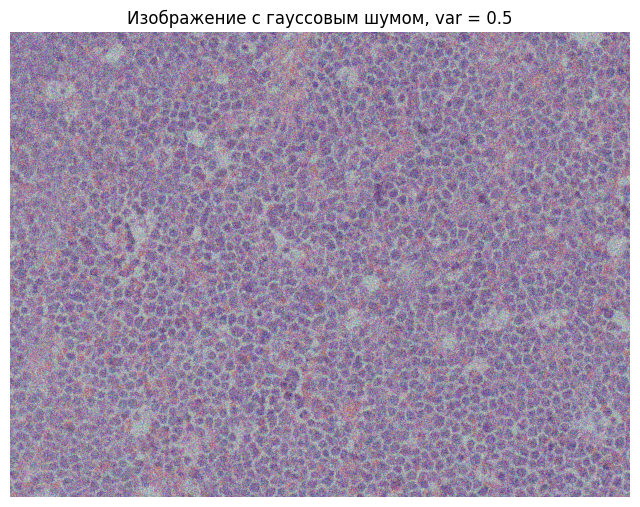

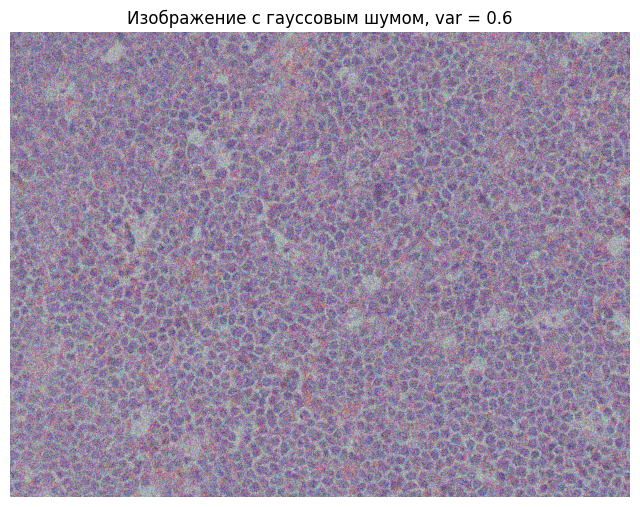

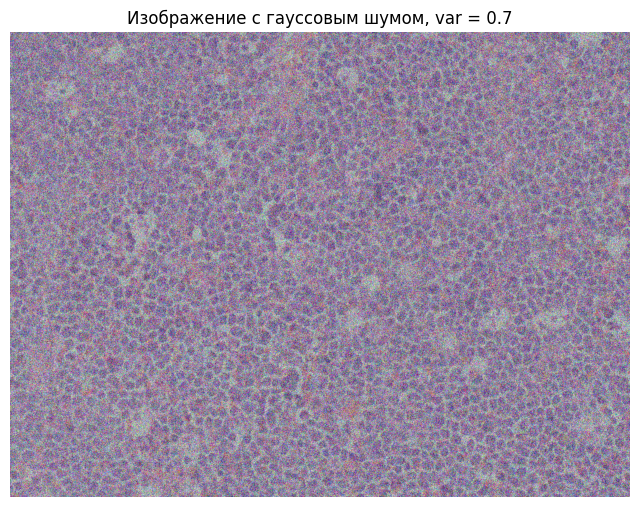

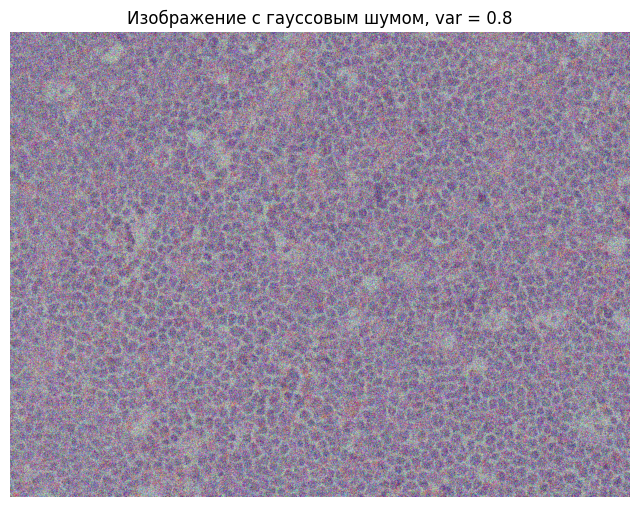

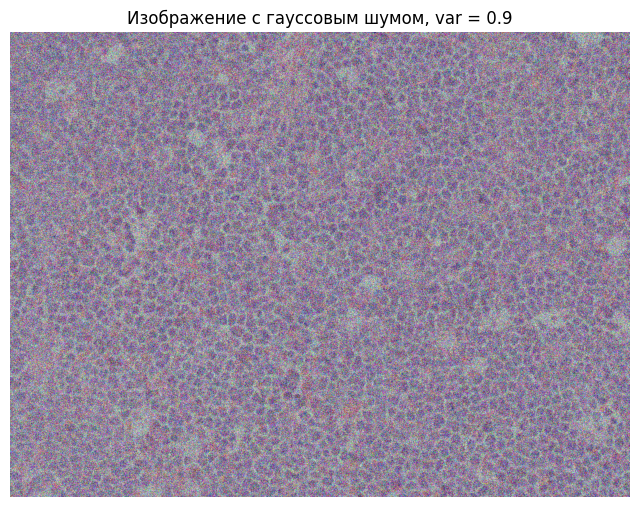

In [78]:
# 1. Добавление гауссова шума и визуализация
noise_vars = np.arange(0.5, 1.0, 0.1)

for var in noise_vars:
    noisy_image = util.random_noise(image, mode='gaussian', var=var)
    
    plt.figure(figsize=(8, 8))
    plt.title(f"Изображение с гауссовым шумом, var = {round(var, 1)}")
    plt.imshow(noisy_image)
    plt.axis('off')
    plt.show()

Задание 3. Применение фильтров

In [ ]:
from skimage.color import rgb2gray

# Применение средного и медианного фильтров
mean_filtered = rank.mean(rgb2gray(noisy_image), disk(3))
median_filtered = median(rgb2gray(noisy_image), disk(3))
# Применение гауссова фильтра
gaussian_filtered = gaussian(rgb2gray(noisy_image), sigma=1)

Задание 4. Сравнение результатов

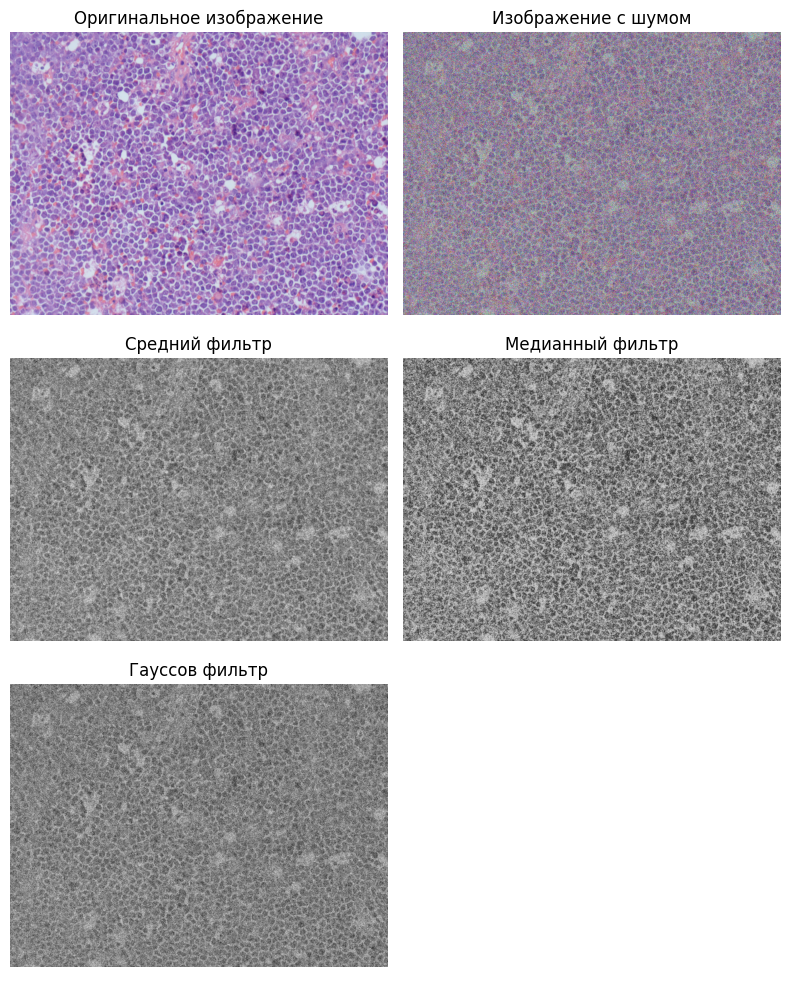

In [71]:
# Создание графиков
fig, axes = plt.subplots(3, 2, figsize=(8, 10), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title("Оригинальное изображение")

ax[1].imshow(noisy_image, cmap=plt.cm.gray)
ax[1].set_title("Изображение с шумом")

ax[2].imshow(mean_filtered, cmap=plt.cm.gray)
ax[2].set_title("Средний фильтр")

ax[3].imshow(median_filtered, cmap=plt.cm.gray)
ax[3].set_title("Медианный фильтр")

ax[4].imshow(gaussian_filtered, cmap=plt.cm.gray)
ax[4].set_title("Гауссов фильтр")

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

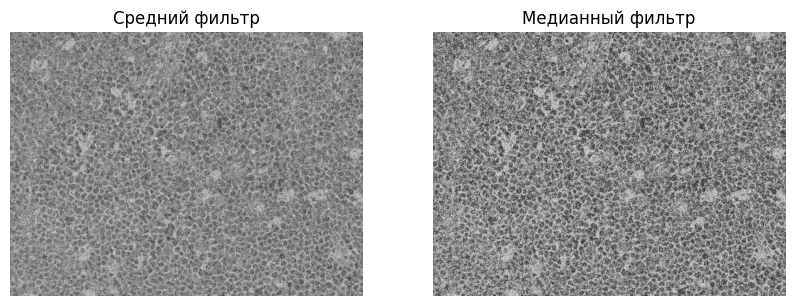

In [72]:
# Визуализация среднего и медианного фильтра
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(mean_filtered, cmap='gray')
axes[0].set_title('Средний фильтр')
axes[0].axis('off')

axes[1].imshow(median_filtered, cmap='gray')
axes[1].set_title('Медианный фильтр')
axes[1].axis('off')

plt.show()

Задание 5. Сравнение методов фильтрации

(-0.5, 2583.5, 1935.5, -0.5)

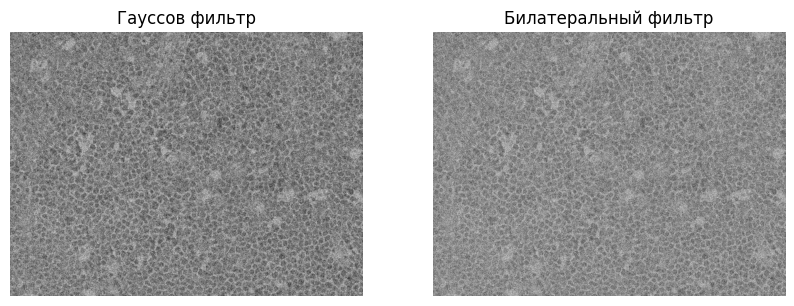

In [74]:
from skimage.restoration import denoise_bilateral

# Применение Билатерального фильтра
bilateral_filtered = denoise_bilateral(rgb2gray(noisy_image), sigma_color=0.05, sigma_spatial=15)

# Визуализация результатов
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(gaussian_filtered, cmap='gray')
axes[0].set_title('Гауссов фильтр')
axes[0].axis('off')

axes[1].imshow(bilateral_filtered, cmap='gray')
axes[1].set_title('Билатеральный фильтр')
axes[1].axis('off')

Задание 6. Оценка качества фильтрации

- PSNR (Peak Signal-to-Noise Ratio) измеряет уровень шума по отношению к сигналу и часто используется для оценки качества изображений. Это отношение максимальной возможной мощности сигнала к мощности шума.

- SSIM (Structural Similarity Index) предназначен для оценки 
визуального качества, учитывая изменение структуры, контраста и яркости 
изображения. SSIM оценит схожесть между двумя изображениями в более 
комплексном контексте, чем PSNR.

C:\Users\dapol\AppData\Local\Temp\ipykernel_25112\548595908.py:6: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr = peak_signal_noise_ratio(original, filtered)


Гауссов фильтр: PSNR = 17.76, SSIM = 0.20
Средний фильтр: PSNR = -42.69, SSIM = 0.00
Медианный фильтр: PSNR = 16.90, SSIM = 0.20
Билатеральный фильтр: PSNR = 9.71, SSIM = 0.03


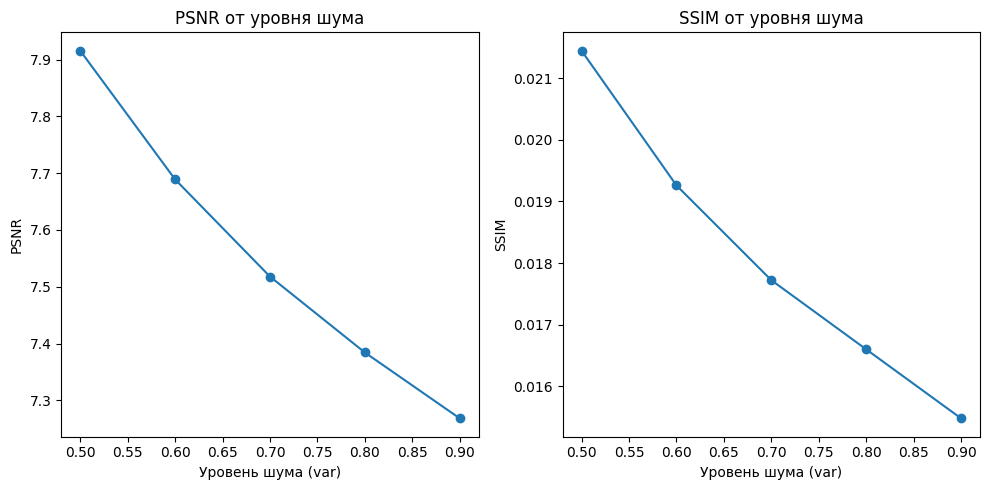

In [85]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
from skimage.util import random_noise

# Рассчет PSNR и SSIM для изображений после фильтрации
def calculate_metrics(original, filtered):
    psnr = peak_signal_noise_ratio(original, filtered)
    ssim = structural_similarity(original, filtered, data_range=filtered.max() - filtered.min())
    return psnr, ssim

# Рассчет для одного метода (например, гауссов фильтр)
psnr_gaussian, ssim_gaussian = calculate_metrics(rgb2gray(image), gaussian_filtered)

# Рассчет для всех методов
psnr_mean, ssim_mean = calculate_metrics(rgb2gray(image), mean_filtered)
psnr_median, ssim_median = calculate_metrics(rgb2gray(image), median_filtered)
psnr_bilateral, ssim_bilateral = calculate_metrics(rgb2gray(image), bilateral_filtered)

# Вывод результатов
print(f'Гауссов фильтр: PSNR = {psnr_gaussian:.2f}, SSIM = {ssim_gaussian:.2f}')
print(f'Средний фильтр: PSNR = {psnr_mean:.2f}, SSIM = {ssim_mean:.2f}')
print(f'Медианный фильтр: PSNR = {psnr_median:.2f}, SSIM = {ssim_median:.2f}')
print(f'Билатеральный фильтр: PSNR = {psnr_bilateral:.2f}, SSIM = {ssim_bilateral:.2f}')

# Оценка PSNR и SSIM для изображений с различными уровнями шума
psnr_values = []
ssim_values = []

for var in noise_vars:
    noisy_image = random_noise(rgb2gray(image), mode='gaussian', var=var)
    psnr = peak_signal_noise_ratio(rgb2gray(image), noisy_image)
    ssim = structural_similarity(rgb2gray(image), noisy_image, data_range=noisy_image.max() - noisy_image.min())
    psnr_values.append(psnr)
    ssim_values.append(ssim)

# Построение графиков зависимости PSNR и SSIM от уровня шума
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(noise_vars, psnr_values, marker='o')
ax[0].set_title('PSNR от уровня шума')
ax[0].set_xlabel('Уровень шума (var)')
ax[0].set_ylabel('PSNR')

ax[1].plot(noise_vars, ssim_values, marker='o')
ax[1].set_title('SSIM от уровня шума')
ax[1].set_xlabel('Уровень шума (var)')
ax[1].set_ylabel('SSIM')

plt.tight_layout()
plt.show()